# Naive Bayes and Logistic Regression on the Diabetes data set
The data set is from [Kaggle](https://www.kaggle.com/datasets/himanshunakrani/naive-bayes-classification-data)

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression

In [5]:
data = pd.read_csv("../raw_data/Naive-Bayes-Classification-Data.csv")

In [6]:
data.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [7]:
data.describe()

,glucose,bloodpressure,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


📝 Let's visualize the data

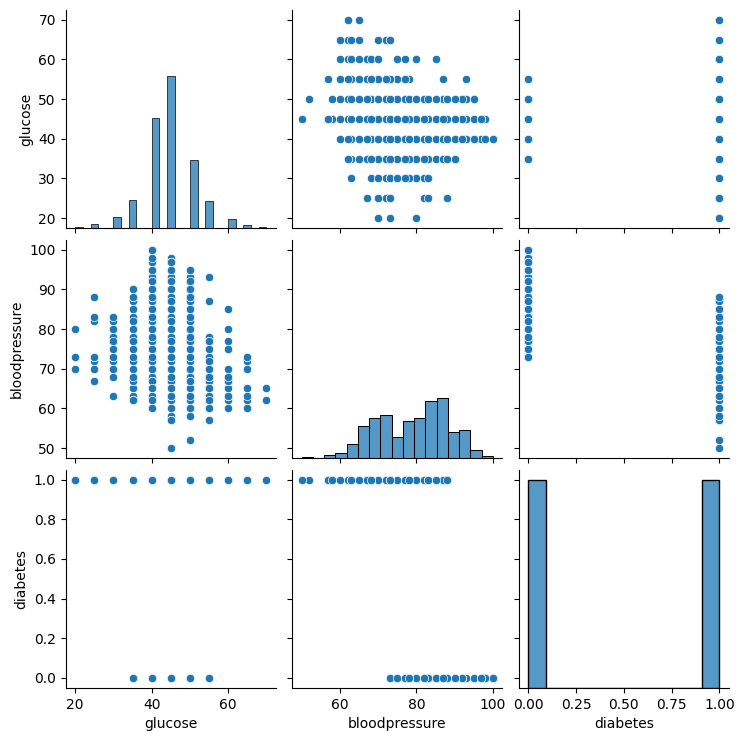

In [36]:
sns.pairplot(data)

📝The column diabetes has 2 unique values

In [9]:
data.diabetes.unique()

array([0, 1])

📝 The dataset is balanced

In [10]:
data.diabetes.value_counts()

1    498
0    497
Name: diabetes, dtype: int64

📝 Choose features X and target y

It is not precised what 0 and 1 means. But, knowing that people with diabets are more likely to have [high blood pressure](https://www.hopkinsmedicine.org/health/conditions-and-diseases/diabetes/diabetes-and-high-blood-pressure), let's consider 0 is diabets and 1 is no diabets

In [13]:
X = data[['glucose', 'bloodpressure']]
y= data['diabetes']

📝 Let scale the values

In [14]:
mms = MinMaxScaler()
X_trans = mms.fit_transform(X)

📝 Split in train and test

In [15]:
#stratify = target allow to make sure that equal portion of the dataset enter the training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(X_trans, y, test_size= 0.2, random_state = 365, stratify= y)

In [16]:
y_train.value_counts(normalize=True)

1    0.5
0    0.5
Name: diabetes, dtype: float64

In [17]:
y_test.value_counts(normalize=True)

1    0.502513
0    0.497487
Name: diabetes, dtype: float64

📝 Using a Gaussian Naive Bayes

It makes the assumption that the likelyhood function of the features is Gaussian.

In [23]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [24]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [25]:
y_test_pred_gnb = gnb.predict(x_test)

📝 The True negatives (0,0), False positives (0,1) or type 1 errors, False negatives (1,0) or type 2 errors, True positives (1,1)

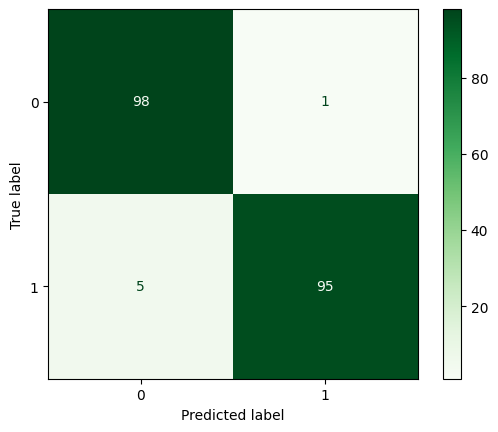

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_gnb, 
                                        labels = gnb.classes_, 
                                        cmap="Greens");

In [40]:
print(classification_report(y_test, y_test_pred_gnb, target_names=["diabets", "no-diabets"]))

              precision    recall  f1-score   support

     diabets       0.95      0.99      0.97        99
  no-diabets       0.99      0.95      0.97       100

    accuracy                           0.97       199
   macro avg       0.97      0.97      0.97       199
weighted avg       0.97      0.97      0.97       199



accuracy is the overall accuracy of the model which is of 97% (TP+TN/ TP+TN+FP+FN) = correctly predicted/all samples

precision = TP/TP+FP There is 99% that a person predicted with no-diabetes doesn't have diabetes. There is 95% that a person predict with diabetes has diabetes.  

recall = TP/TP+FN the model as caught 95% of the people diagnose with no-diabetes. the model as caught 99% of the people diagnose with diabetes.

F1 score: Harmonic mean of precision and recall. The harmonic mean penalizes lower values more heavily. 2/((1/precision)+(1/recall))


📝 Using Logistic Regression

In [31]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [32]:
y_test_pred_lr = lr.predict(x_test)

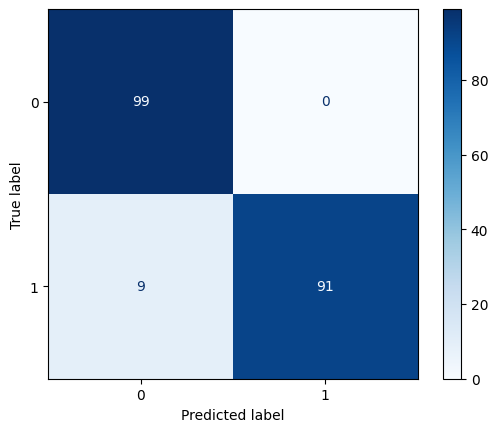

In [42]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_lr, 
                                        labels = lr.classes_, 
                                        cmap="Blues");

In [41]:
print(classification_report(y_test, y_test_pred_lr, target_names=["diabets", "no-diabets"]))

              precision    recall  f1-score   support

     diabets       0.92      1.00      0.96        99
  no-diabets       1.00      0.91      0.95       100

    accuracy                           0.95       199
   macro avg       0.96      0.96      0.95       199
weighted avg       0.96      0.95      0.95       199



accuracy is the overall accuracy of the model which is of 95% (TP+TN/ TP+TN+FP+FN) = correctly predicted/all samples

precision = TP/TP+FP There is 100% that a person predicted with no-diabetes doesn't have diabetes. There is 92% that a person predict with diabetes has diabetes.  

recall = TP/TP+FN the model as caught 100% of the people diagnose with no-diabetes. the model as caught 91% of the people diagnose with diabetes.

F1 score: Harmonic mean of precision and recall. The harmonic mean penalizes lower values more heavily. 2/((1/precision)+(1/recall))


📝 Final Report

It is better that a person is predicted by the model as having diabetes and then later learn that she doesn't have diabetes than the other way around. It is therefore better to have False positive than False Negatives. 

Overall, the Gaussian Naive Bayes is the best one of the two models.